In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings('ignore')
import zipcodes as zcode

palette_color = sns.color_palette('bright')
from matplotlib.patches import Shadow




from sklearn import metrics 
from sklearn.metrics import log_loss , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV




In [2]:
data = pd.read_csv(r'C:\Users\iran\Pictures\Screenshots\Bank_Personal.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df = pd.DataFrame (data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df1 = df.drop("ID" , axis = 1)
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


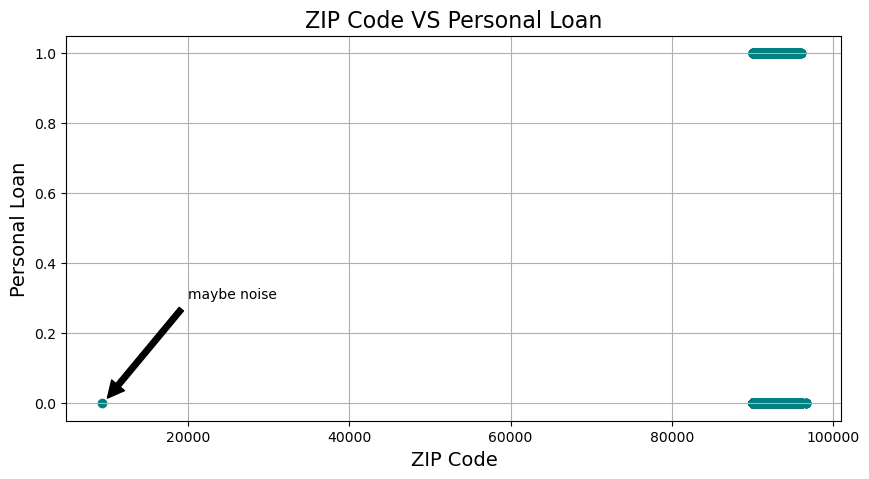

In [8]:
plt.figure( figsize = (10 , 5))
plt.scatter (df1["ZIP Code"] , df1["Personal Loan"] , color = "teal")
plt.xlabel ("ZIP Code" , fontsize = 14)
plt.ylabel ("Personal Loan" , fontsize = 14)
plt.title ("ZIP Code VS Personal Loan" , fontsize = 16)
plt.annotate('maybe noise' , xy = (9500 , 0) , xytext = (20000, 0.30) , arrowprops = dict(facecolor = 'black' , shrink = 0.05))

plt.grid()
plt.show()

In [9]:
df1 [(df1["Personal Loan"] < 0.2) & (df1["ZIP Code"] < 20000)]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [10]:
df1.drop(index = [384] , inplace = True)
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
!pip install zipcodes 

In [12]:
df.rename(columns={"ZIP Code":"ZIPCode"},inplace=True)
df.ZIPCode.nunique()

467

In [13]:
list_zipcode=df.ZIPCode.unique()

In [14]:
dict_zip={}

for zipcode in list_zipcode:
    address = zcode.matching(zipcode.astype('str'))
    
    if len(address)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=address[0].get('county')
        
    else:
        county=zipcode
        
        
    dict_zip.update({zipcode:county }) 

In [15]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [16]:
df['County']=df['ZIPCode'].map(dict_zip)
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Orange County
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,San Diego County
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ventura County
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles County


In [17]:
####  Analyze each feature  ####
#### First Age

In [18]:
df1['Age']

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 4999, dtype: int64

In [19]:
df1['Age'].describe()

count    4999.000000
mean       45.337267
std        11.464033
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

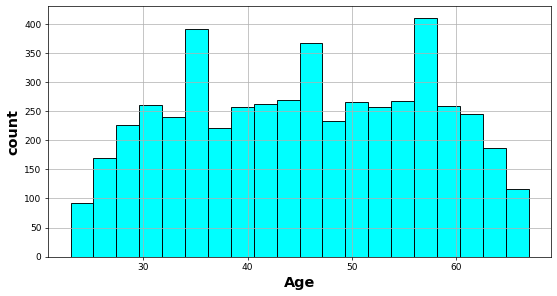

In [20]:
#### count plot
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Age'] , bins = 20 ,  edgecolor="black"  , color = "aqua")
plt.xlabel("Age" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()

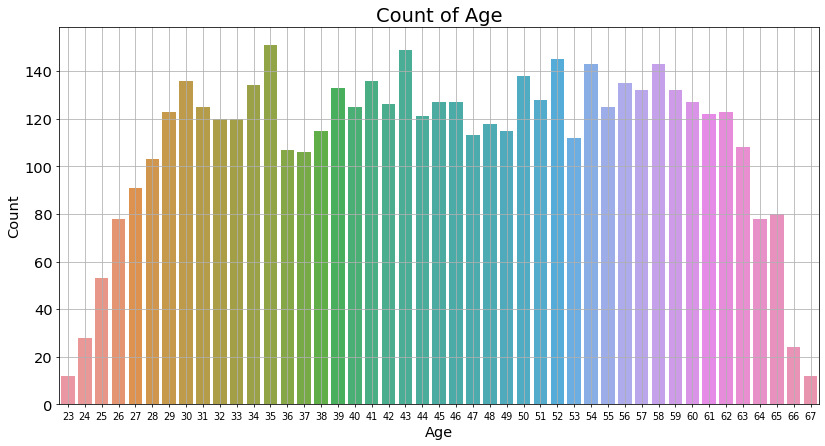

In [21]:
plt.figure(figsize=(14,7), dpi=70)
ax = sns.countplot(x='Age', data=df1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of Age", fontsize=20)
plt.grid()

In [22]:
df_age = round(df1['Age']/10)*10
df_age

0       20.0
1       40.0
2       40.0
3       40.0
4       40.0
        ... 
4995    30.0
4996    30.0
4997    60.0
4998    60.0
4999    30.0
Name: Age, Length: 4999, dtype: float64

Text(0.5, 1.0, 'Pie Chart of age in customerss')

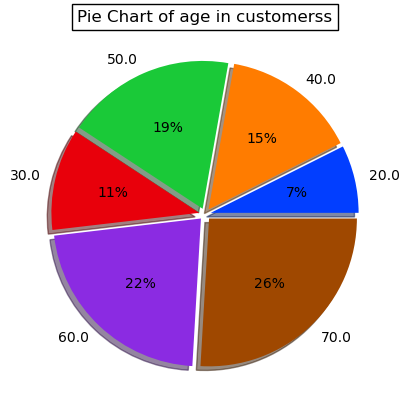

In [23]:
explode = ( 0.04, 0.04,  0.04,  0.04,  0.04,  0.04)
plt.pie(df_age.unique(), labels=df_age.unique(), colors=palette_color ,autopct='%.0f%%' ,  shadow = True , explode=explode )
plt.title("Pie Chart of age in customerss",bbox={'facecolor':'1', 'pad':4})


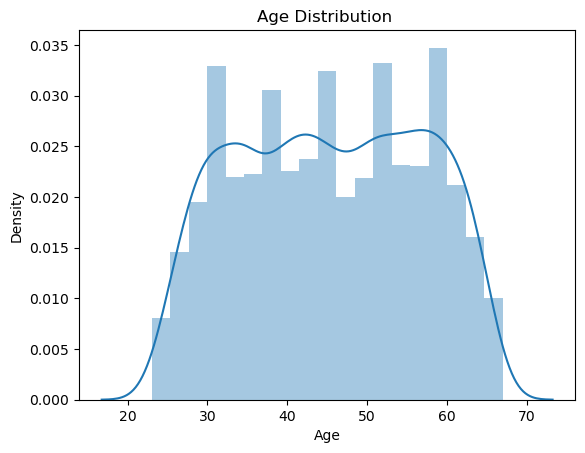

In [24]:
sns.distplot(df1['Age'])
plt.title('Age Distribution ');

<AxesSubplot:xlabel='Age', ylabel='Density'>

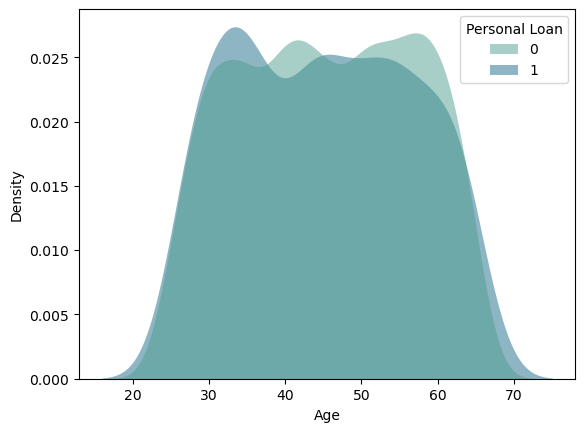

In [25]:
sns.kdeplot(
   data=df1, x='Age', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [26]:
#### Analyze Experience  ####

In [27]:
df1['Experience']

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 4999, dtype: int64

In [28]:
##### wow !   we have negative Experience !!!
#### so, we will use abs function
df1['Experience'].describe()

count    4999.000000
mean       20.103621
std        11.468892
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [29]:
df1['Experience'] = df1['Experience'].abs()

In [30]:
df1['Experience'].describe()

count    4999.000000
mean       20.133627
std        11.416124
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

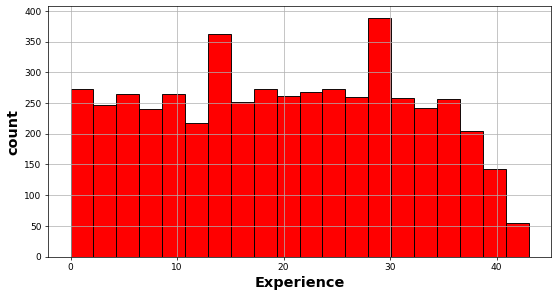

In [31]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Experience'] , bins = 20 ,  edgecolor="black"  , color = "r")
plt.xlabel("Experience" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()

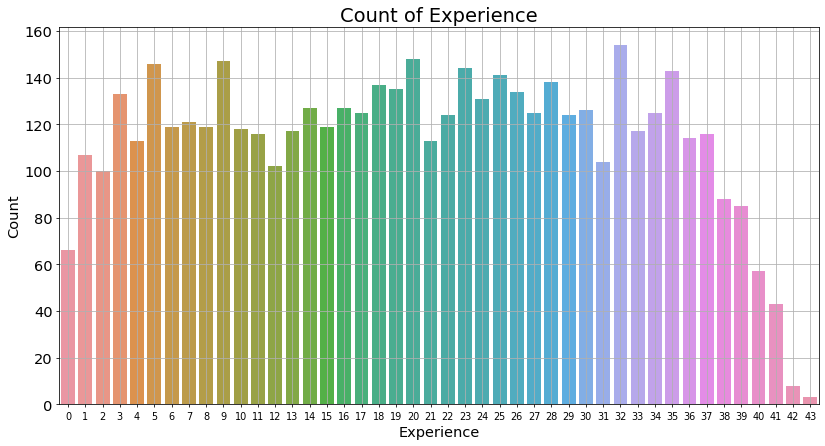

In [32]:
plt.figure(figsize=(14,7), dpi=70)
ax = sns.countplot(x='Experience', data=df1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Experience", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of Experience", fontsize=20)
plt.grid()

In [33]:
df_Experience = round(df1['Experience']/10)*10
df_Experience

0        0.0
1       20.0
2       20.0
3       10.0
4       10.0
        ... 
4995     0.0
4996     0.0
4997    40.0
4998    40.0
4999     0.0
Name: Experience, Length: 4999, dtype: float64

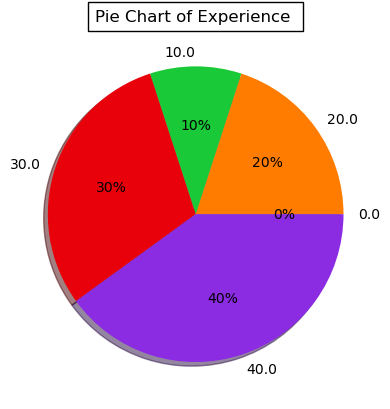

In [34]:
plt.pie(df_Experience.unique(), labels=df_Experience.unique(), colors=palette_color, autopct='%.0f%%' , shadow = True )
plt.title("Pie Chart of Experience ", bbox={'facecolor':'1', 'pad':5})
plt.show()

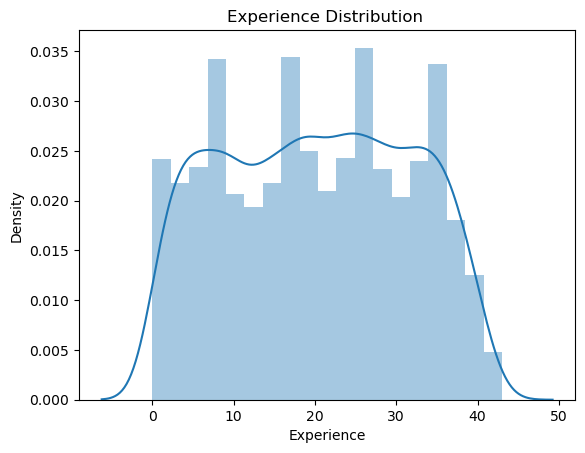

In [35]:
sns.distplot(df1['Experience'])
plt.title('Experience Distribution ');

<AxesSubplot:xlabel='Experience', ylabel='Density'>

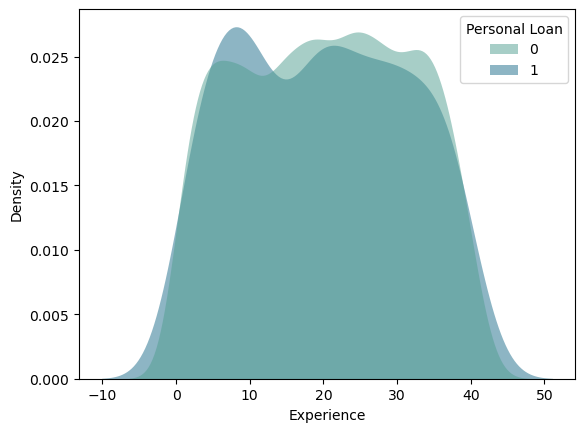

In [36]:
sns.kdeplot(
   data=df1, x='Experience', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [37]:
#### Analyze Income  ####

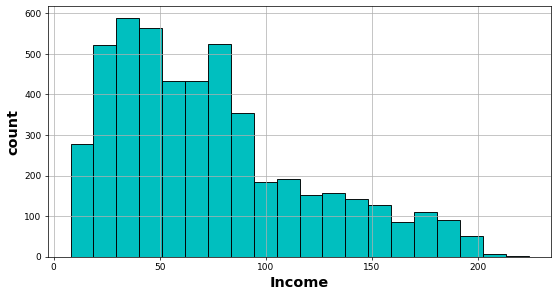

In [38]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Income'] , bins = 20 ,  edgecolor="black"  , color = "c")
plt.xlabel("Income" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()

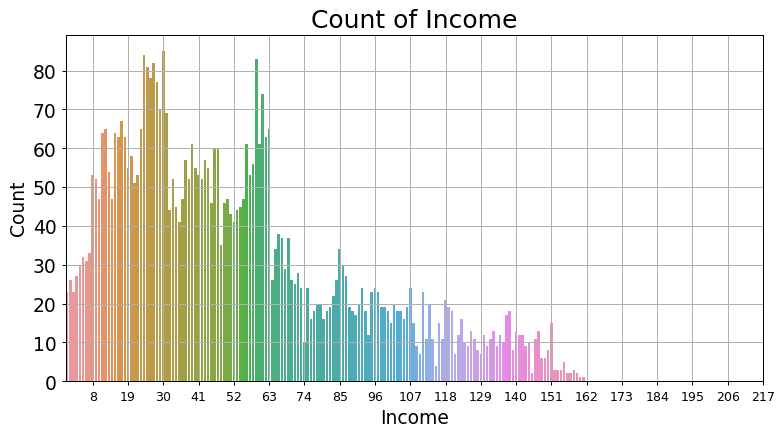

In [39]:
import matplotlib.ticker as ticker


plt.figure(figsize=(10,5), dpi=90)
ax = sns.countplot(x='Income', data=df1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of Income", fontsize=20)
plt.xticks(np.arange((df1['Income']).min(), (df1['Income']).max(), round(((df1['Income']).max()-(df1['Income']).min())/20)))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.grid()

In [40]:
df_Income = round(df1['Income']/10)*10
df_Income

0        50.0
1        30.0
2        10.0
3       100.0
4        40.0
        ...  
4995     40.0
4996     20.0
4997     20.0
4998     50.0
4999     80.0
Name: Income, Length: 4999, dtype: float64

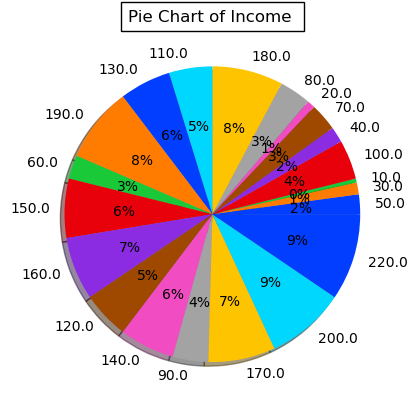

In [41]:
plt.pie(df_Income.unique(), labels=df_Income.unique(), colors=palette_color, autopct='%.0f%%' , shadow = True )
plt.title("Pie Chart of Income ", bbox={'facecolor':'1', 'pad':5})
plt.show()

# it is not usefull, so lets round them to nearest 20

In [42]:
df_Income = round(df1['Income']/20)*20
df_Income

0        40.0
1        40.0
2        20.0
3       100.0
4        40.0
        ...  
4995     40.0
4996     20.0
4997     20.0
4998     40.0
4999     80.0
Name: Income, Length: 4999, dtype: float64

In [43]:
df_Income.unique()

array([ 40.,  20., 100.,  80., 180., 120., 200.,  60., 160., 140.,   0.,
       220.])

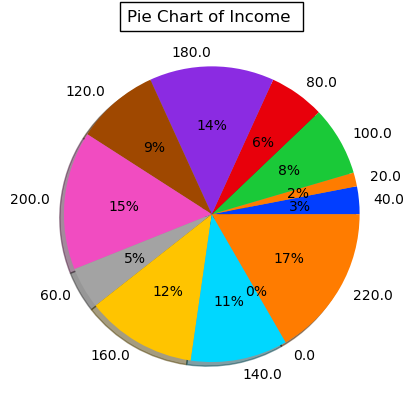

In [44]:
plt.pie(df_Income.unique(), labels=df_Income.unique(), colors=palette_color, autopct='%.0f%%' , shadow = True )
plt.title("Pie Chart of Income ", bbox={'facecolor':'1', 'pad':5})
plt.show()


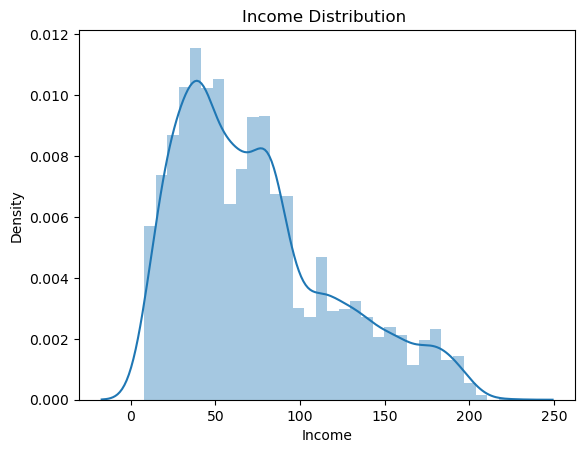

In [45]:
sns.distplot(df1['Income'])
plt.title('Income Distribution ');

<AxesSubplot:xlabel='Income', ylabel='Density'>

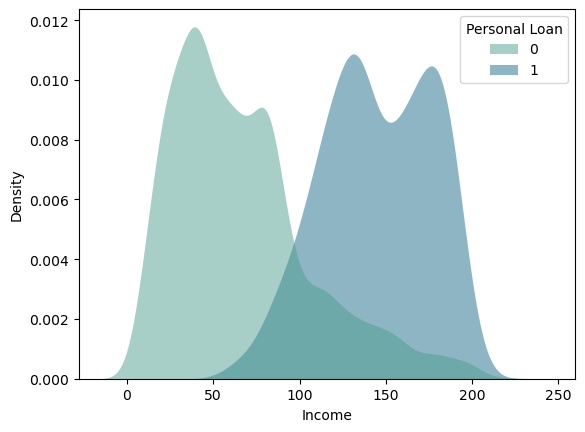

In [46]:
sns.kdeplot(
   data=df1, x='Income', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [47]:
 #### Analyze ZIP Code  ####

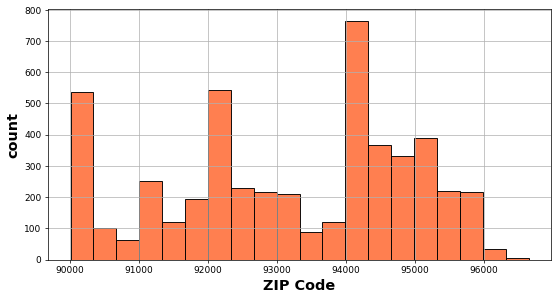

In [48]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['ZIP Code'] , bins = 20 ,  edgecolor="black"  , color = "coral")
plt.xlabel("ZIP Code" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()

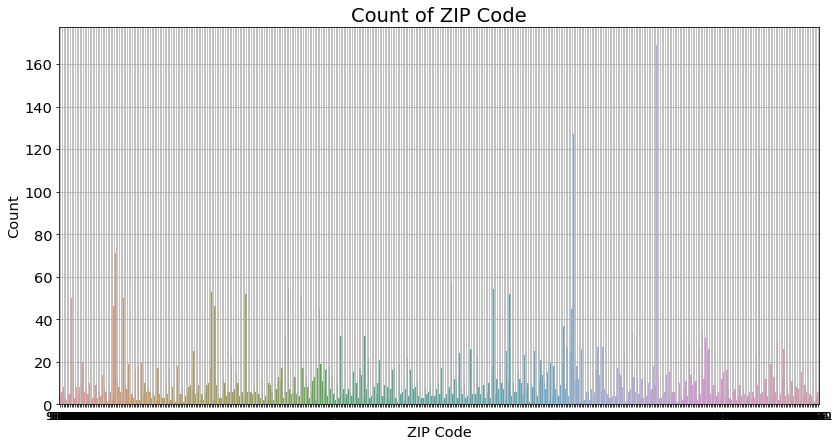

In [49]:
plt.figure(figsize=(14,7), dpi=70)
ax = sns.countplot(x='ZIP Code', data=df1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("ZIP Code", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of ZIP Code", fontsize=20)
plt.grid()

In [50]:
df_ZIPCode = round(df1['ZIP Code'])
df_ZIPCode

0       91107
1       90089
2       94720
3       94112
4       91330
        ...  
4995    92697
4996    92037
4997    93023
4998    90034
4999    92612
Name: ZIP Code, Length: 4999, dtype: int64

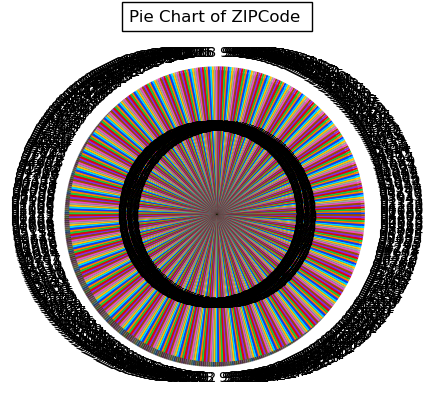

In [51]:
plt.pie(df_ZIPCode.unique(), labels=df_ZIPCode.unique(), colors=palette_color, autopct='%.0f%%' , shadow = True )
plt.title("Pie Chart of ZIPCode ", bbox={'facecolor':'1', 'pad':5})
plt.show()

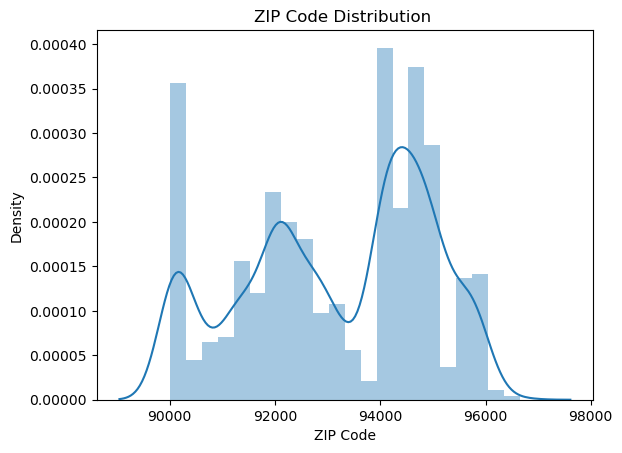

In [52]:
sns.distplot(df1['ZIP Code'])
plt.title('ZIP Code Distribution ');

<AxesSubplot:xlabel='ZIP Code', ylabel='Density'>

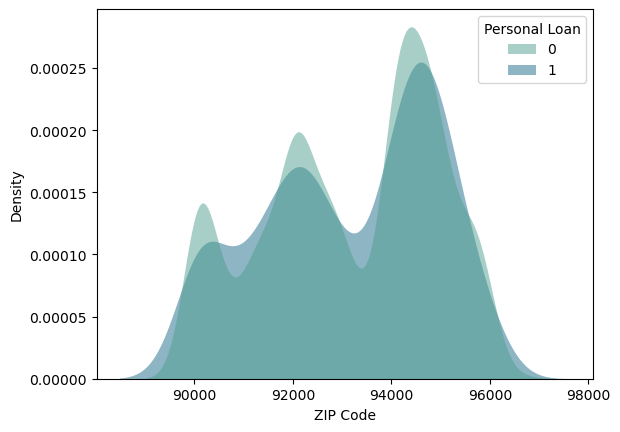

In [53]:
sns.kdeplot(
   data=df1, x='ZIP Code', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [54]:
 #### Analyze ZIP Code  ####

In [55]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


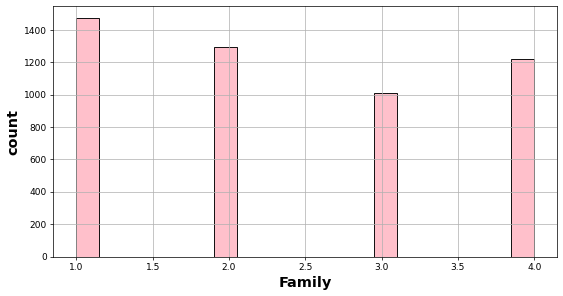

In [56]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Family'] , bins = 20 ,  edgecolor="black"  , color = "pink")
plt.xlabel("Family" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()

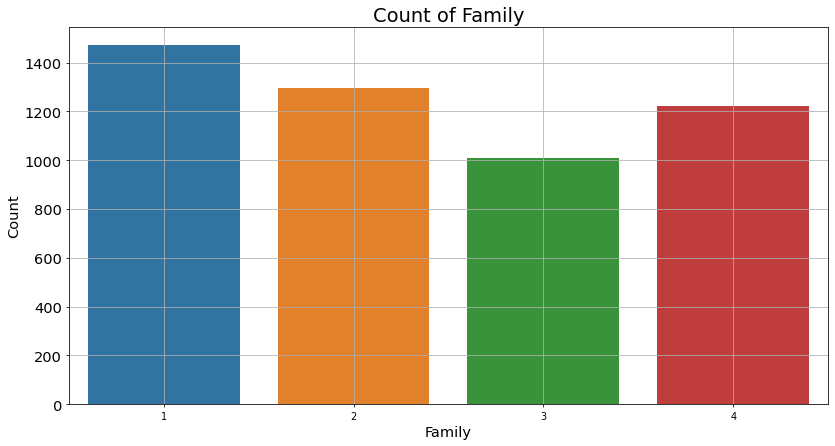

In [57]:
plt.figure(figsize=(14,7), dpi=70)
ax = sns.countplot(x='Family', data=df1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Family", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of Family", fontsize=20)
plt.grid()

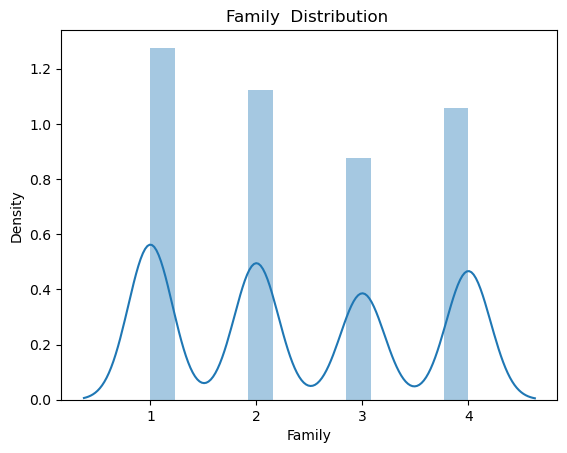

In [58]:
sns.distplot(df1['Family'])
plt.title('Family  Distribution ');

<AxesSubplot:xlabel='Family', ylabel='Density'>

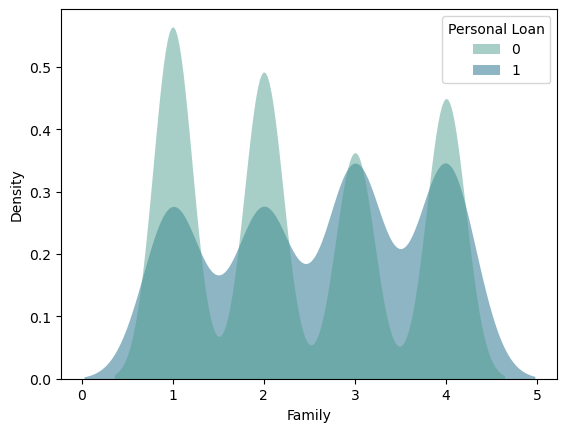

In [59]:
sns.kdeplot(
   data=df1, x='Family', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [60]:
 #### Analyze CCAvg  ####

In [61]:
df1['CCAvg'] =  df1['CCAvg']*12
df1['CCAvg']

0       19.2
1       18.0
2       12.0
3       32.4
4       12.0
        ... 
4995    22.8
4996     4.8
4997     3.6
4998     6.0
4999     9.6
Name: CCAvg, Length: 4999, dtype: float64

In [62]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


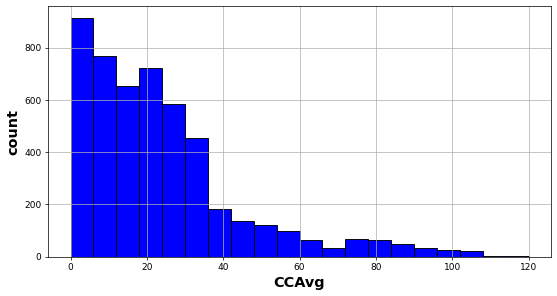

In [63]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['CCAvg'] , bins = 20 ,  edgecolor="black"  , color = "Blue")
plt.xlabel("CCAvg" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()

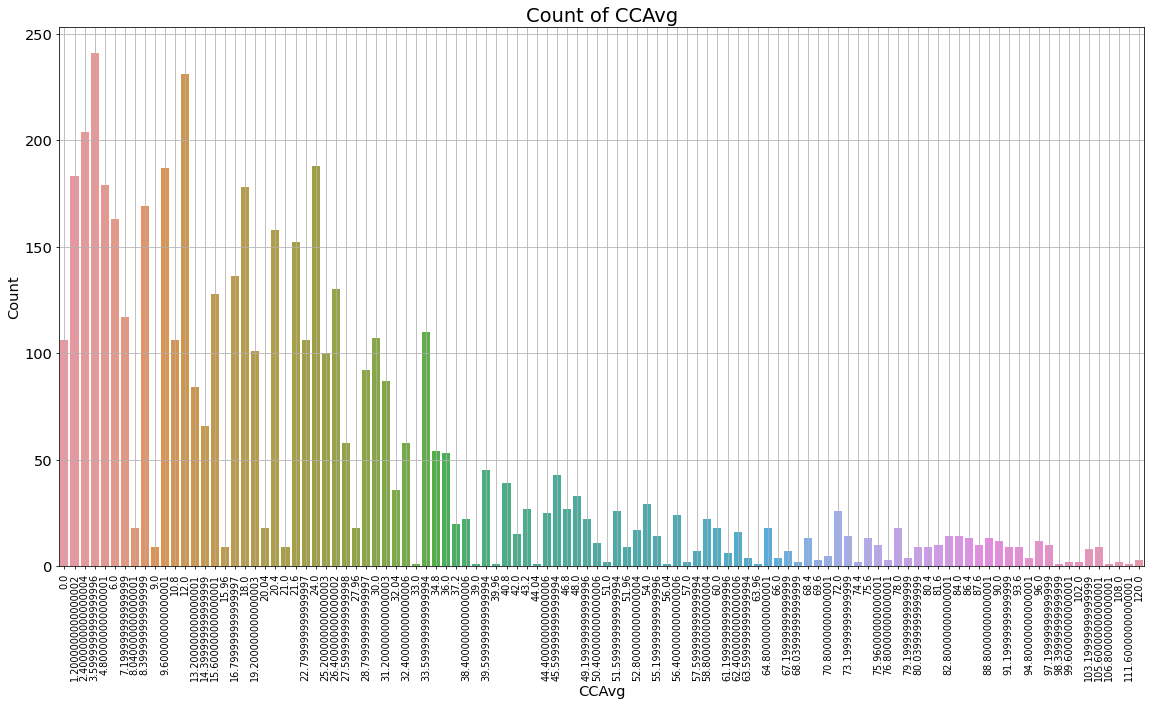

In [64]:
plt.figure(figsize=(20,10), dpi=70)
ax = sns.countplot(x='CCAvg', data=df1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("CCAvg", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of CCAvg", fontsize=20)
plt.grid()

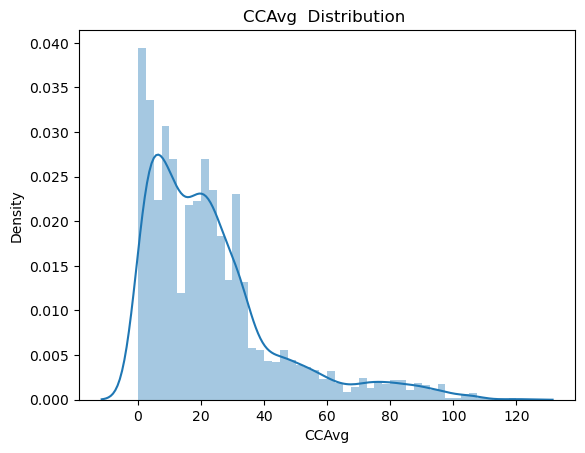

In [65]:
sns.distplot(df1['CCAvg'])
plt.title('CCAvg  Distribution ');

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

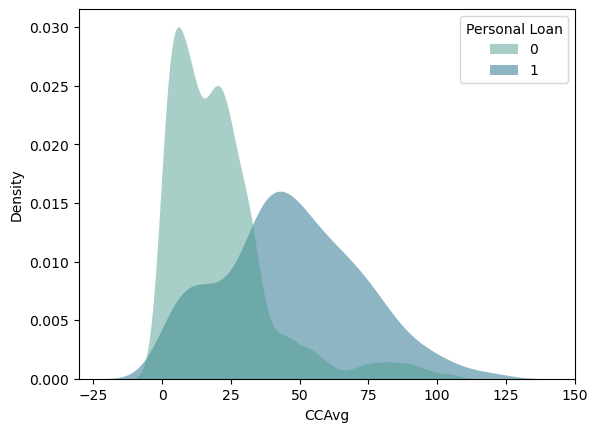

In [66]:
sns.kdeplot(
   data=df1, x='CCAvg', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [67]:
#### Analyze Education  ####

In [68]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


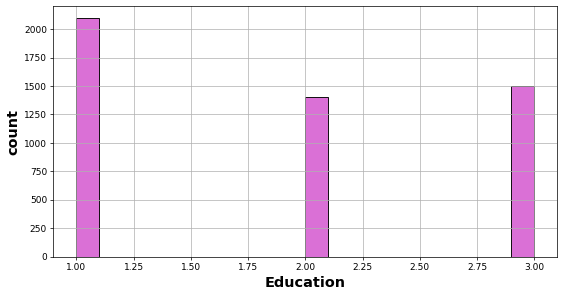

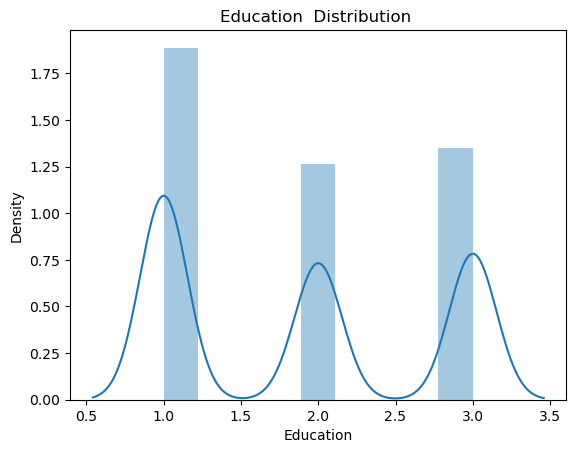

In [69]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Education'] , bins = 20 ,  edgecolor="black"  , color = "orchid")
plt.xlabel("Education" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()
sns.distplot(df1['Education'])
plt.title('Education  Distribution ');

<AxesSubplot:xlabel='Education', ylabel='Density'>

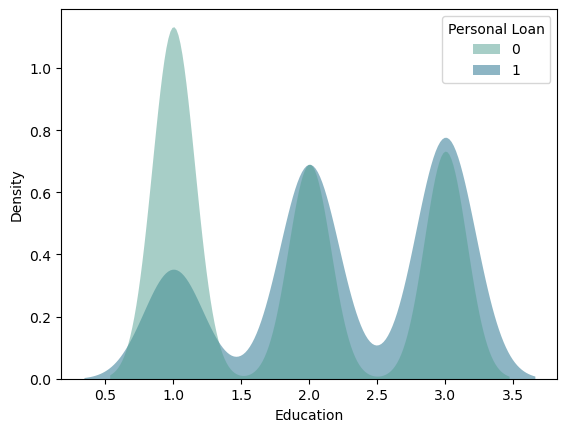

In [70]:
sns.kdeplot(
   data=df1, x='Education', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [71]:
#### Analyze Mortgage  ####

In [72]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


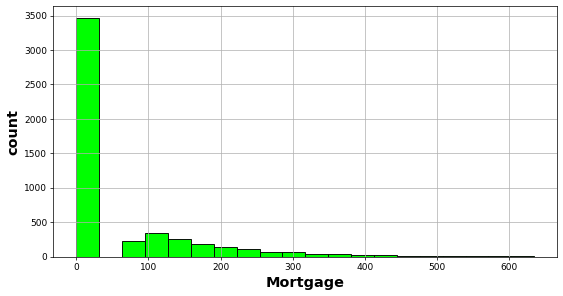

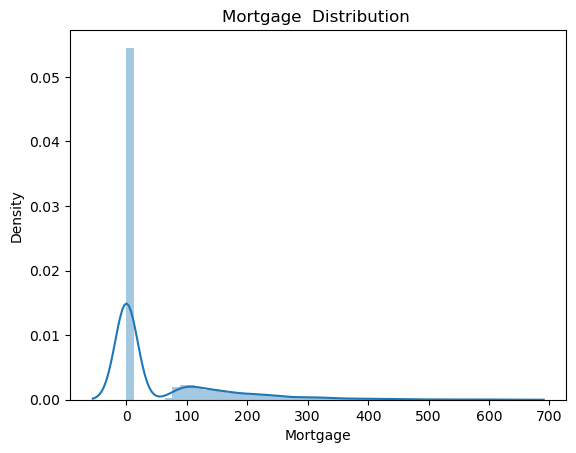

In [73]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Mortgage'] , bins = 20 ,  edgecolor="black"  , color = "lime")
plt.xlabel("Mortgage" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()
sns.distplot(df1['Mortgage'])
plt.title('Mortgage  Distribution ');

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

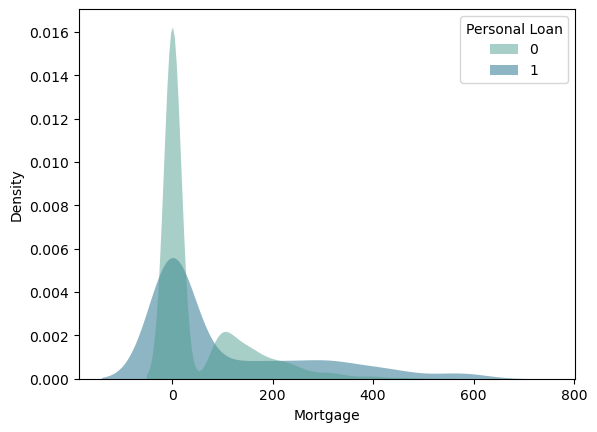

In [74]:
sns.kdeplot(
   data=df1, x='Mortgage', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [75]:
#### Analyze Securities Account  ####

In [76]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


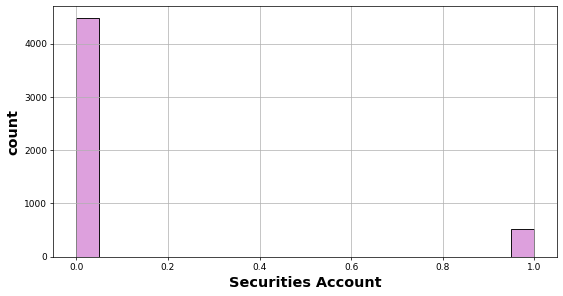

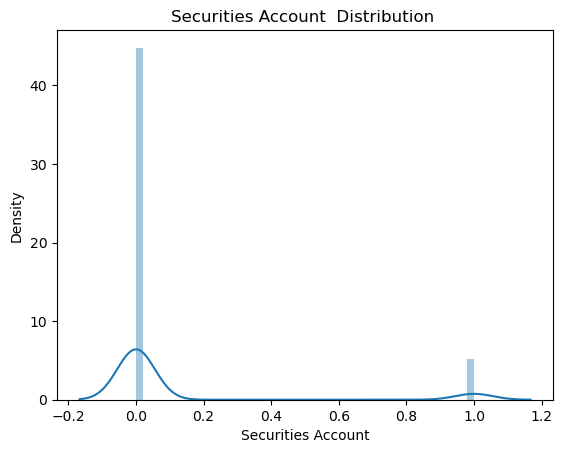

In [77]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Securities Account'] , bins = 20 ,  edgecolor="black"  , color = "plum")
plt.xlabel("Securities Account" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()
sns.distplot(df1['Securities Account'])
plt.title('Securities Account  Distribution ');

<AxesSubplot:xlabel='Securities Account', ylabel='Density'>

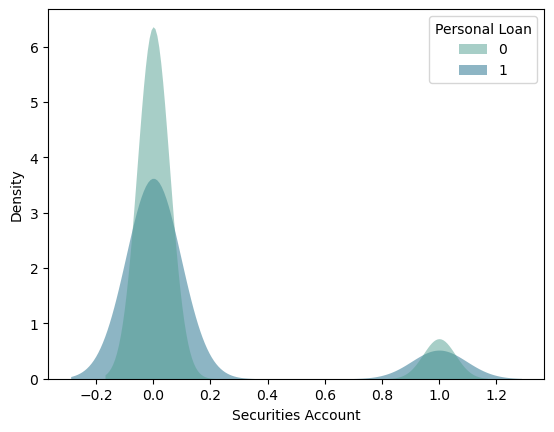

In [78]:
sns.kdeplot(
   data=df1, x='Securities Account', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [79]:
#### Analyze Securities Account  ####

In [80]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


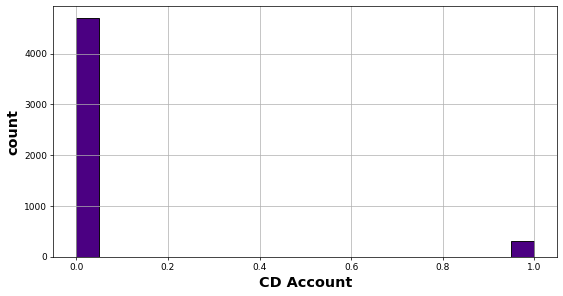

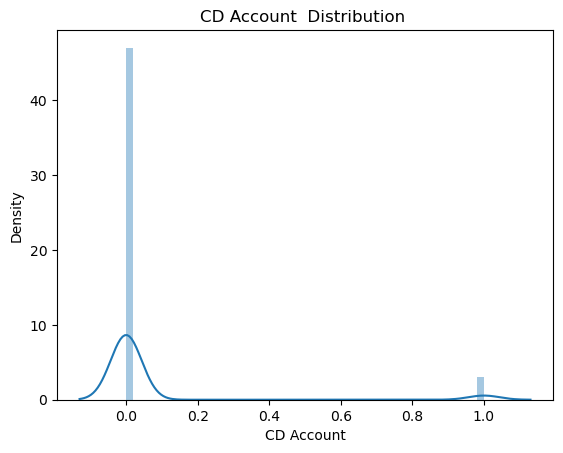

In [81]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['CD Account'] , bins = 20 ,  edgecolor="black"  , color = "indigo")
plt.xlabel("CD Account" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()
sns.distplot(df1['CD Account'])
plt.title('CD Account  Distribution ');

<AxesSubplot:xlabel='CD Account', ylabel='Density'>

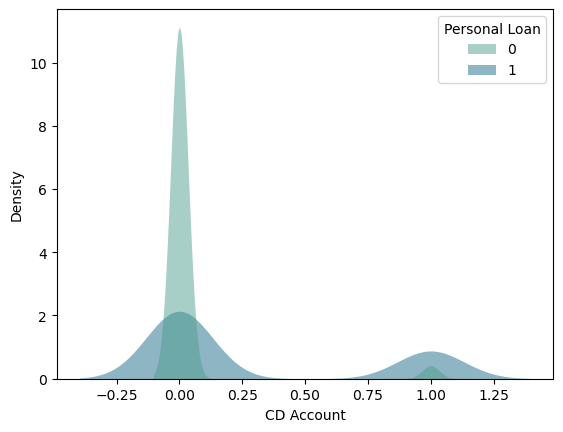

In [82]:
sns.kdeplot(
   data=df1, x='CD Account', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [83]:
#### Analyze Online ####

In [84]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


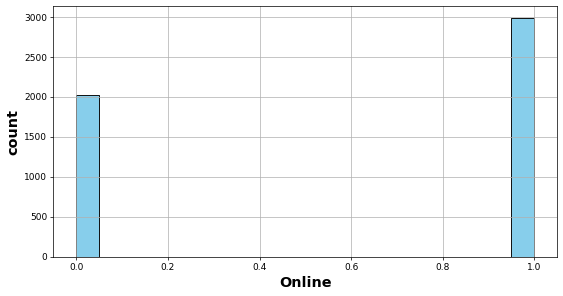

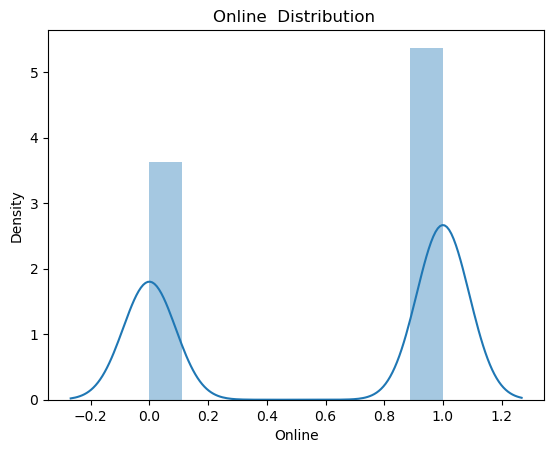

In [85]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['Online'] , bins = 20 ,  edgecolor="black"  , color = "skyblue")
plt.xlabel("Online" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()
sns.distplot(df1['Online'])
plt.title('Online  Distribution ');

<AxesSubplot:xlabel='Online', ylabel='Density'>

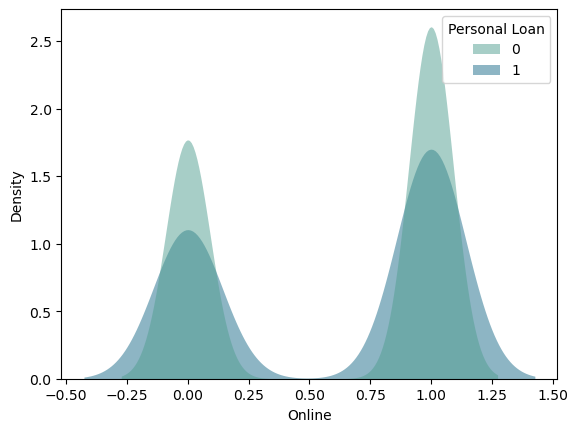

In [86]:
sns.kdeplot(
   data=df1, x='Online', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [87]:
#### Analyze CreditCard ####

In [88]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


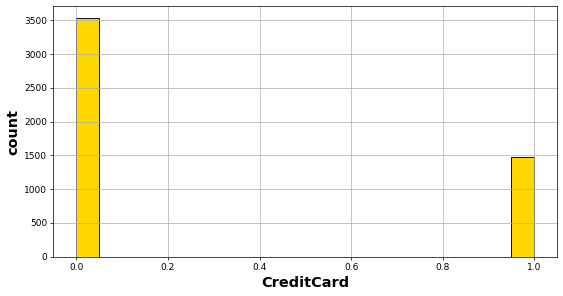

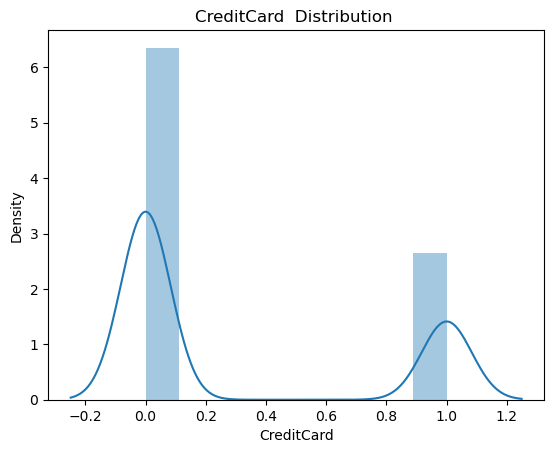

In [89]:
plt.figure(figsize =(10 , 5) ,  dpi=65)
plt.hist(df1['CreditCard'] , bins = 20 ,  edgecolor="black"  , color = "gold")
plt.xlabel("CreditCard" , fontweight='bold' , fontsize = 16)
plt.ylabel("count" ,fontweight='bold' , fontsize = 16)
plt.grid()
plt.show()
sns.distplot(df1['CreditCard'])
plt.title('CreditCard  Distribution ');

<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

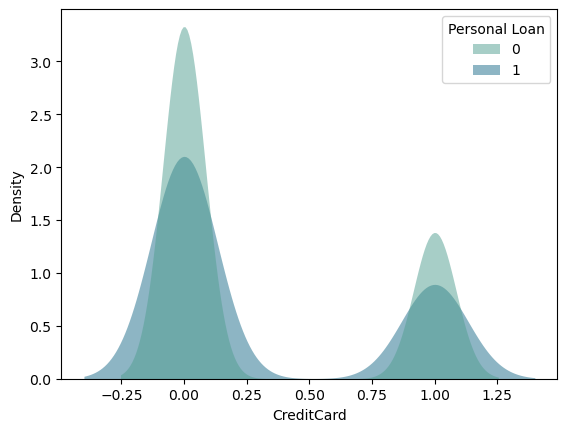

In [90]:
sns.kdeplot(
   data=df1, x='CreditCard', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [91]:
###################### General Data Analysis on all features ######################

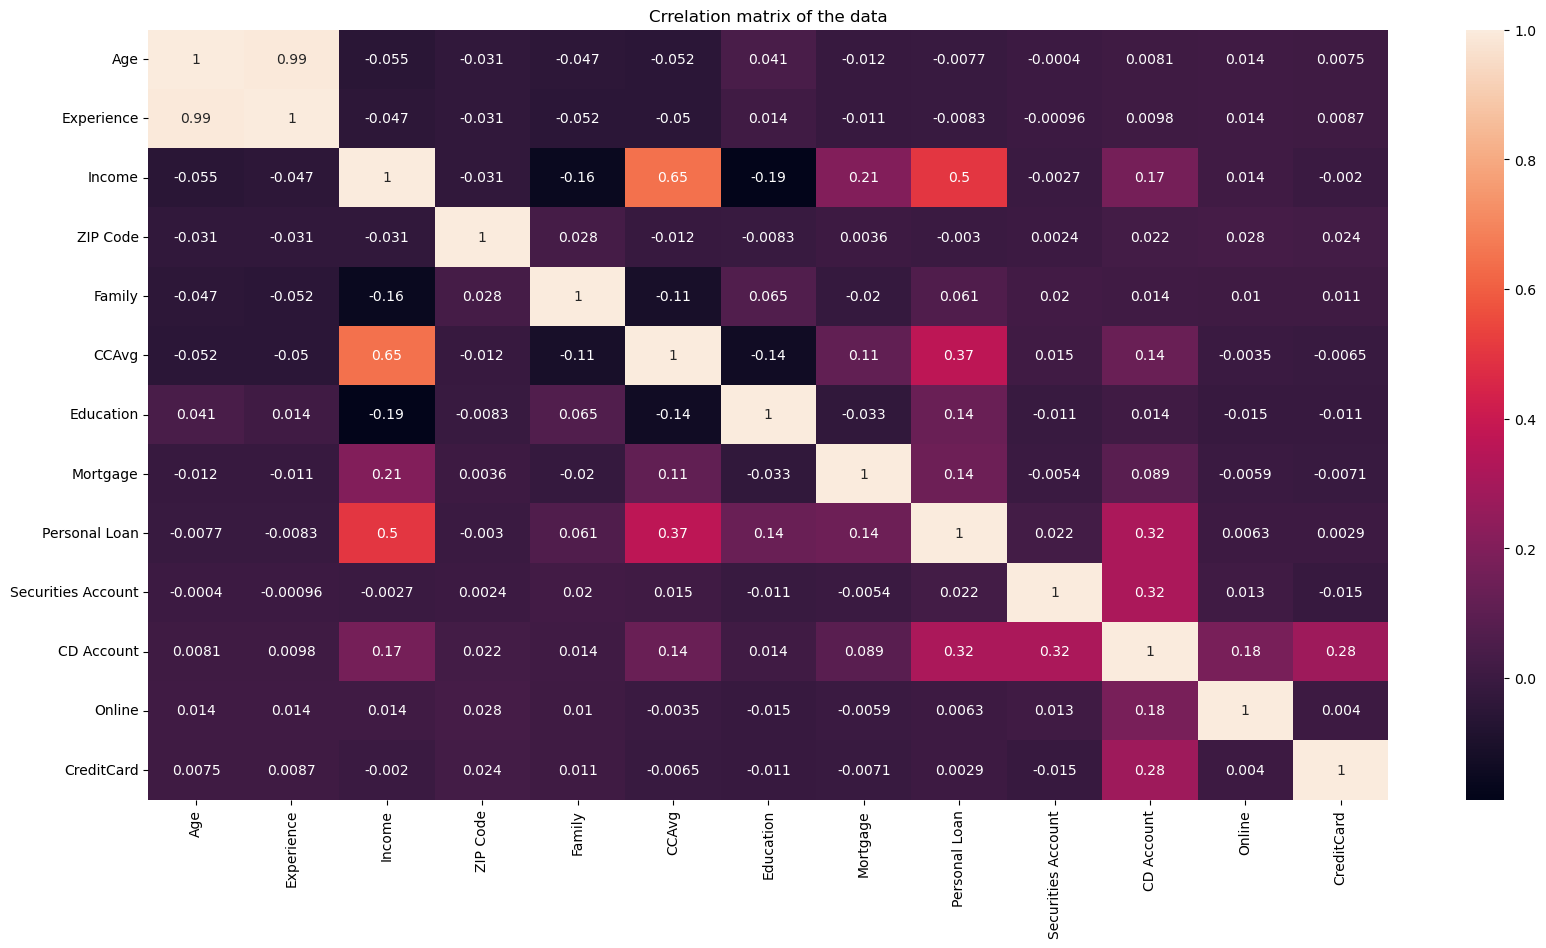

In [92]:
plt.figure(figsize =(20 , 10))
hm = sns.heatmap(df1.corr() , annot=True)
hm.set(title = "Crrelation matrix of the data")
plt.show()

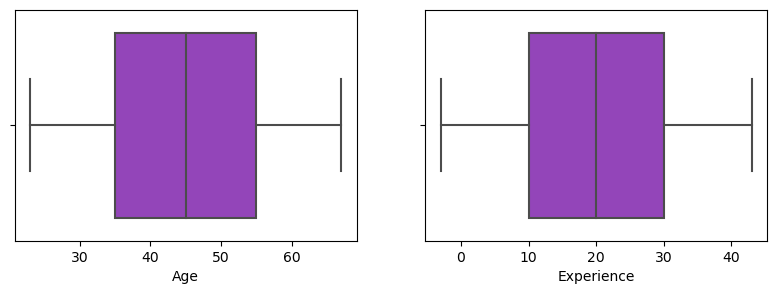

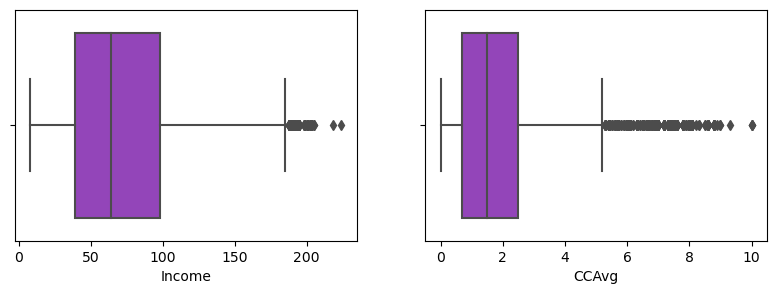

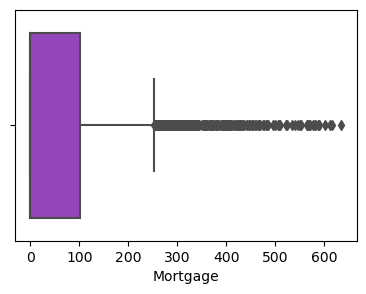

In [93]:
numerical = ['Age' , 'Experience', 'Income' ,'CCAvg' , 'Mortgage']
i = 0 
while i < 5 :
    fig = plt . figure(figsize=[15 , 3])
    plt . subplot(1 ,3 ,1)
    sns . boxplot(x =numerical[i] , data =df ,color='darkorchid')
   

    plt . xlabel(numerical[i] )
    i+=1
    if i== 5 :
        break
    plt . subplot(1 , 3 , 2)
    sns . boxplot(x =numerical[i] , data = df ,color='darkorchid' )
    i += 1


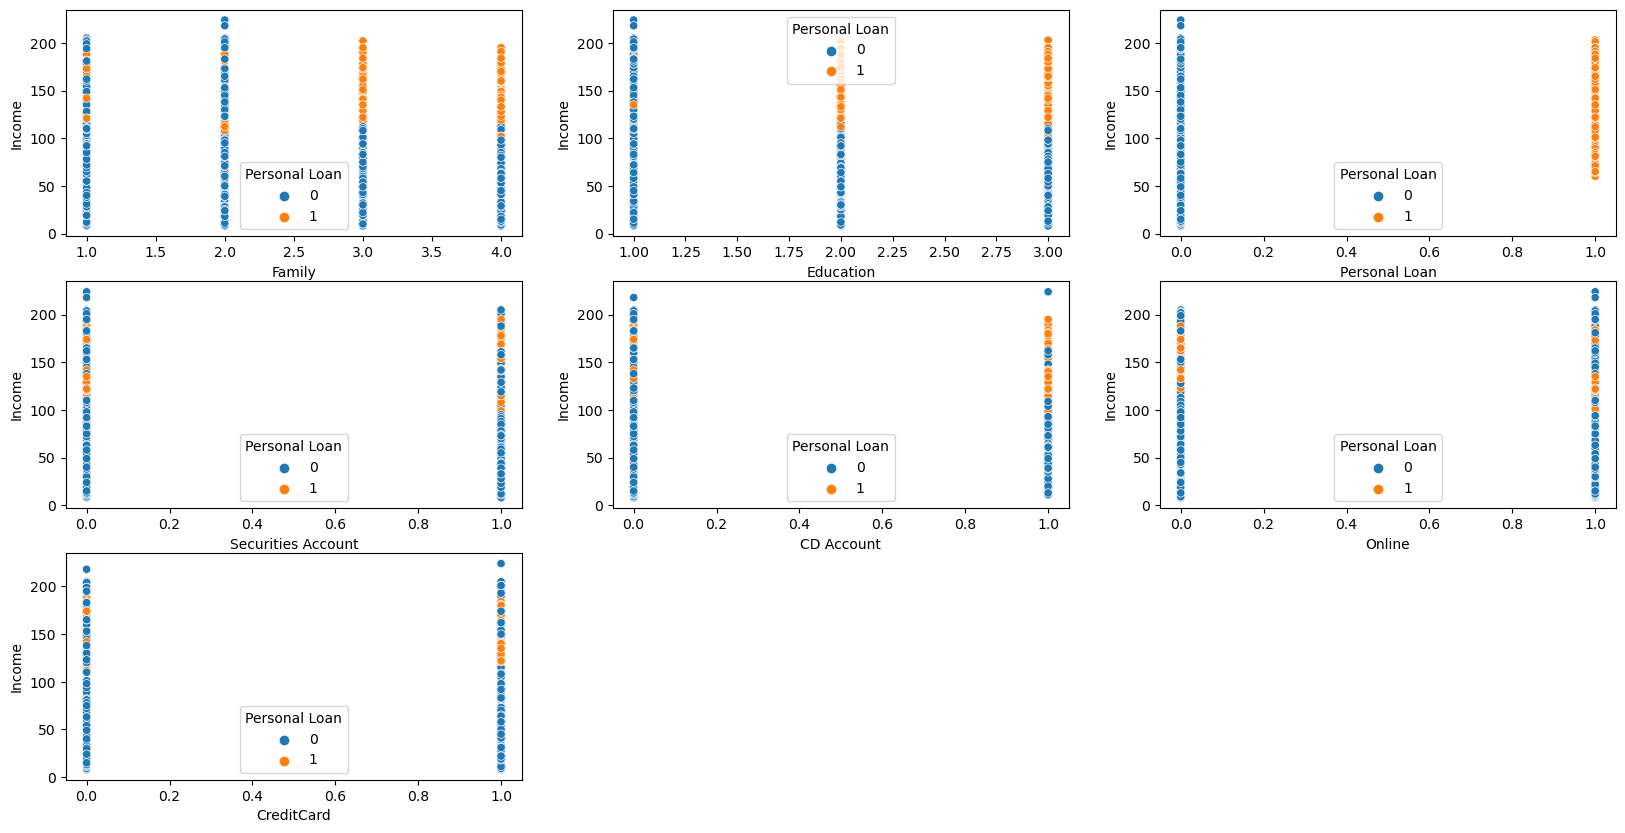

In [94]:
categorical = ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical):
    ax=fig.add_subplot(3 , 3,i+1)
    sns.scatterplot(x=col,y='Income',hue='Personal Loan',data=df)

In [95]:
################### Lets start its ML  ###################

In [96]:
#######  Logestic Regression #########

In [97]:
x = df1.drop(['Personal Loan'] , axis = 1)
x

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,1,0


In [98]:
y = df1['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 4999, dtype: int64

In [99]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

In [100]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_train , y_train)
y_pred = logreg.predict(x_test)
print ('f1 score is :', metrics.f1_score(y_test , y_pred))

f1 score is : 0.3204419889502762


In [101]:
print ("Accuracy :" , metrics.accuracy_score(y_test ,y_pred))

Accuracy : 0.9016


In [102]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1126
           1       0.51      0.23      0.32       124

    accuracy                           0.90      1250
   macro avg       0.71      0.60      0.63      1250
weighted avg       0.88      0.90      0.88      1250



<AxesSubplot:>

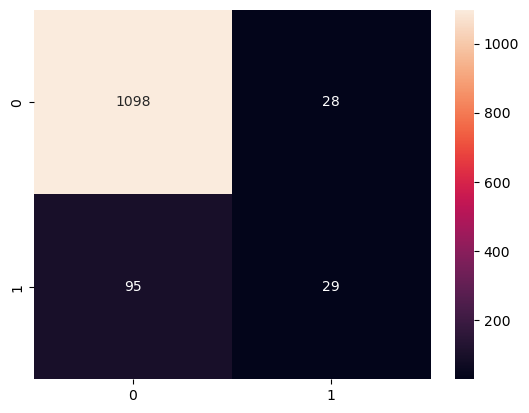

In [103]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='')

In [104]:
confusion_matrix(y_test,y_pred)

array([[1098,   28],
       [  95,   29]], dtype=int64)

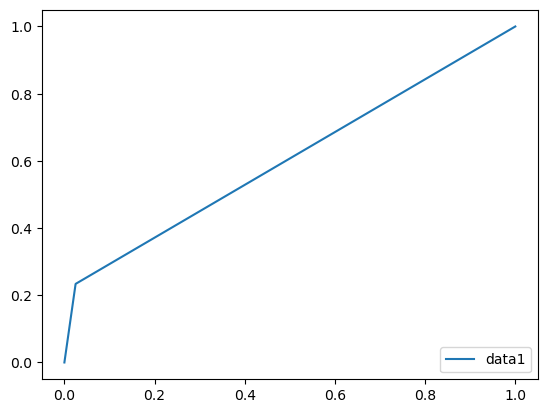

In [105]:
fpr,tpr,_= metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label="data1")
plt.legend(loc=4)
plt.show()

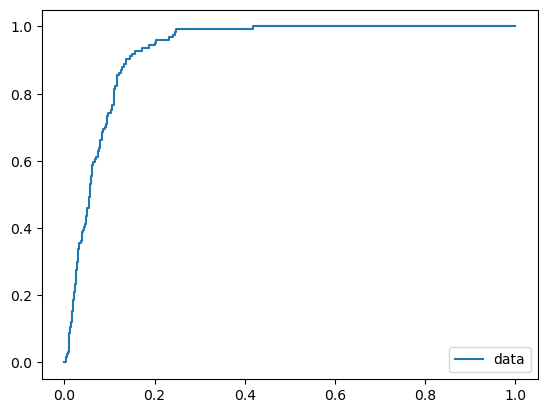

In [106]:
y_pred_proba =logreg.predict_proba(x_test)[::,1]
fpr,tpr,_= metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data")
plt.legend(loc=4)
plt.show()

In [107]:
####  person
# ID = 5071
# Age = 42
# Experienace = 16
# Income = 30
# Zip Code = 92037
# Family = 3
# CCAvg = 1.2
# Education = Advanced = 3
# Mortgage = 0
# Securities Account = 1
# cd account = 0
# Online = 1
# Credit Card = 1
# Will this customer accept the Personal Loan offer?

In [108]:
df_person = [[42,16,30,92037,3,1.2,3,0,1,0,1,1]]

In [109]:
print ("customer : ",log_loss (y_test,y_pred))

customer :  3.398633508241648


In [110]:
#####  KNN model  #####

In [111]:
### we need array
x = df1.drop(['Personal Loan'] , axis = 1).values
x

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

In [112]:
y = df1['Personal Loan'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [114]:
k = 3
clf = KNeighborsClassifier(k)
clf.fit(x_train , y_train.ravel())
y_pred = clf.predict(x_test)
print ('Accuracy :' , metrics.accuracy_score(y_test , y_pred))

Accuracy : 0.8984


In [115]:
k = 5
clf = KNeighborsClassifier(k)
clf.fit(x_train , y_train.ravel())
y_pred = clf.predict(x_test)
print ('Accuracy :' , metrics.accuracy_score(y_test , y_pred))

Accuracy : 0.9072


In [116]:
k = 7
clf = KNeighborsClassifier(k)
clf.fit(x_train , y_train.ravel())
y_pred = clf.predict(x_test)
print ('Accuracy :' , metrics.accuracy_score(y_test , y_pred))

Accuracy : 0.8944


In [117]:
k = 10
clf = KNeighborsClassifier(k)
clf.fit(x_train , y_train.ravel())
y_pred = clf.predict(x_test)
print ('Accuracy :' , metrics.accuracy_score(y_test , y_pred))

Accuracy : 0.9024


In [118]:
### which  k is better ???

In [119]:
k = 20
ACC = np.zeros((k))
for i in range (1 , k+1) :
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train , y_train.ravel())
    y_pred = clf.predict(x_test)
    ACC[i-1] = metrics.accuracy_score(y_test , y_pred)
ACC    


array([0.8896, 0.9008, 0.8984, 0.9016, 0.9072, 0.9024, 0.8944, 0.9008,
       0.9016, 0.9024, 0.9032, 0.9008, 0.8968, 0.9024, 0.9008, 0.9024,
       0.9016, 0.9016, 0.904 , 0.9008])

In [120]:
print(np.max(ACC))
print(np.mean(ACC))

0.9072
0.90068


In [121]:
###### # so best K = 5 , 10


In [122]:
print('x_train shape : ' , x_train.shape)
print('x_test shape : ' , x_test.shape)
print('y_train shape : ' , y_train.shape)
print('y_test shape : ' , y_test.shape)

x_train shape :  (3749, 12)
x_test shape :  (1250, 12)
y_train shape :  (3749,)
y_test shape :  (1250,)


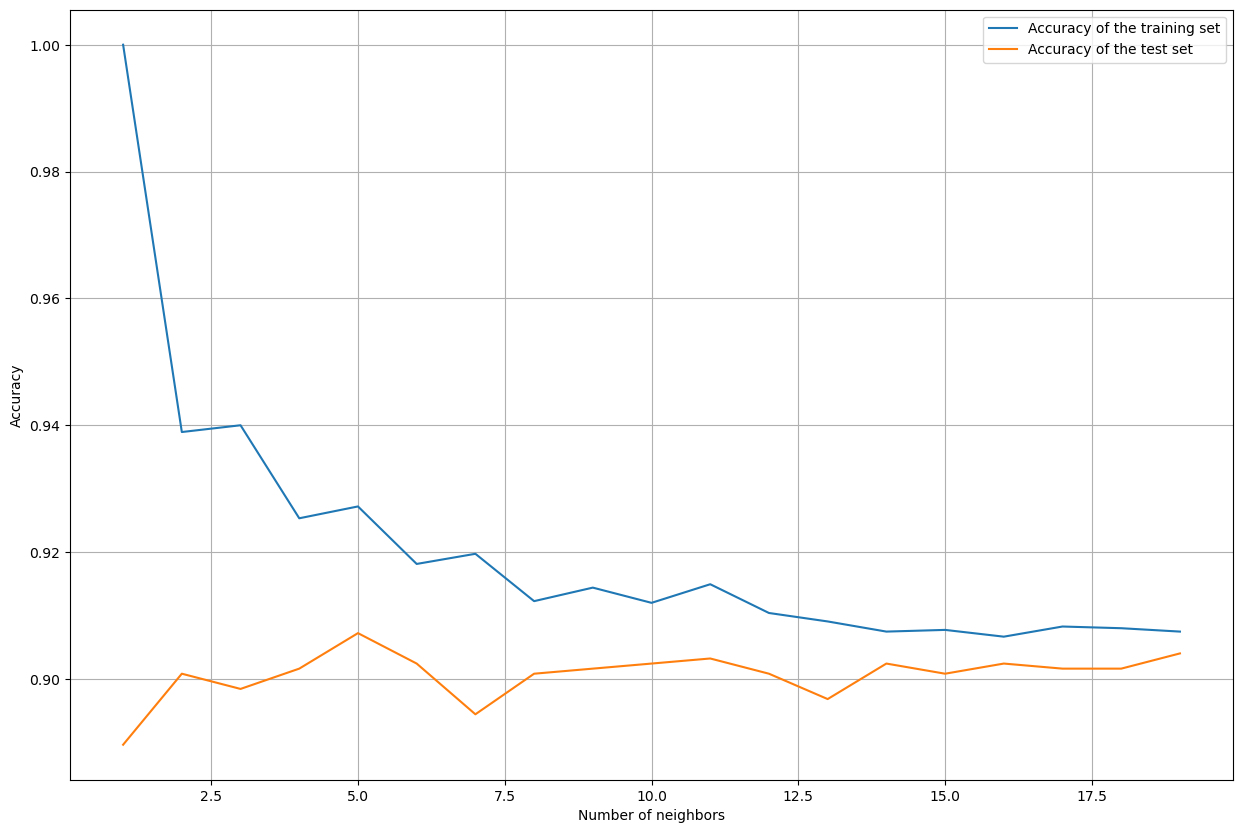

In [123]:
training_acc =[]
test_acc = []
neighbors_setting = range(1,20)
for n_neighbors in neighbors_setting:
    Knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    Knn.fit(x_train,y_train.ravel())
    training_acc.append(Knn.score(x_train,y_train))
    test_acc.append(Knn.score(x_test,y_test))
plt.figure(figsize = (15 , 10))    
plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.grid()
plt.legend()



In [124]:
print(np.max(training_acc))
print(np.mean(test_acc))

1.0
0.9006736842105263


In [125]:
parameters = {"n_neighbors" : range(1 , 20)}
grid_kn = GridSearchCV (estimator =  KNeighborsClassifier() , param_grid = parameters , scoring = 'accuracy'  , cv = 5 , verbose = 1 , n_jobs = -1)
grid_kn.fit(x_train , y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [126]:
grid_kn.best_params_

{'n_neighbors': 10}

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9008


In [128]:
confusion_matrix(y_test,y_pred)

array([[1123,    3],
       [ 121,    3]], dtype=int64)

In [129]:
#### The minimum distance is   k = 10  , 16  ####

In [130]:
print ("customer : ",log_loss (y_test,y_pred))

customer :  3.426248537408972


In [131]:
####### Naive Bayes  _ GaussianNB #######

In [132]:
x = df1.drop(['Personal Loan'] , axis = 1).values
y = df1['Personal Loan'].values


In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [134]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train , y_train)
y_pred = GaussianNB_model.predict(x_test)

In [135]:
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print('train_score :',GaussianNB_model . score(x_train , y_train))

Accuracy :  0.8856
train_score : 0.8906375033342224


In [136]:
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1126
           1       0.44      0.52      0.47       124

    accuracy                           0.89      1250
   macro avg       0.69      0.72      0.70      1250
weighted avg       0.89      0.89      0.89      1250



<AxesSubplot:>

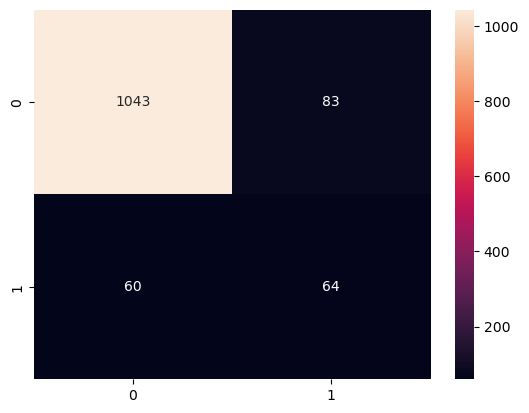

In [137]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='')


In [138]:
print ("Costomer : ",log_loss(y_test,y_pred))


Costomer :  3.9512891128471472


In [139]:
##########   Naive Bayes _ MultinomialNB     #############


In [140]:
MultinomialNB_model = MultinomialNB()
MultinomialNB_model.fit(x_train , y_train)
y_pred = MultinomialNB_model.predict(x_test)

In [141]:
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7944


In [142]:
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1126
           1       0.27      0.61      0.37       124

    accuracy                           0.79      1250
   macro avg       0.61      0.71      0.62      1250
weighted avg       0.88      0.79      0.83      1250



<AxesSubplot:>

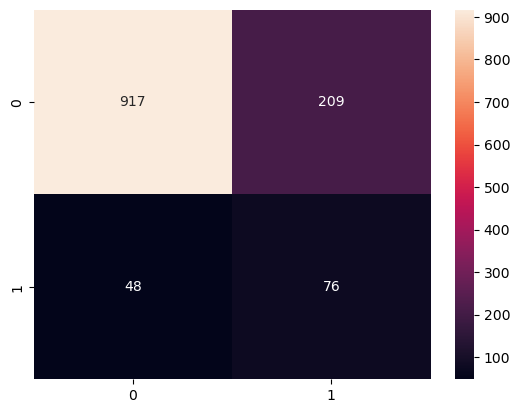

In [143]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='')


In [144]:
########   Naive Bayes _ ComplementNB    ########

In [145]:
ComplementNB_model = ComplementNB()
ComplementNB_model.fit(x_train , y_train)
y_pred = ComplementNB_model.predict(x_test)

In [146]:
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7944


In [147]:
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1126
           1       0.27      0.65      0.38       124

    accuracy                           0.79      1250
   macro avg       0.61      0.73      0.63      1250
weighted avg       0.89      0.79      0.83      1250



<AxesSubplot:>

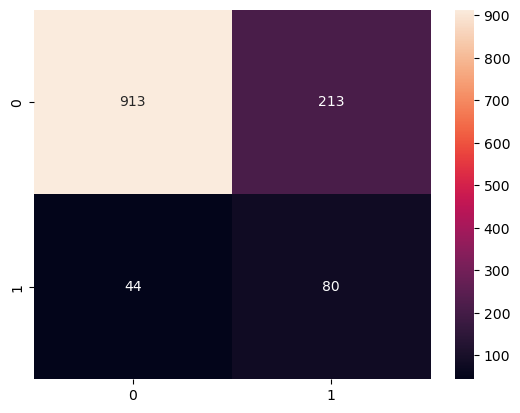

In [148]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='')


In [149]:
print ("Costomer : ",log_loss(y_test,y_pred))


Costomer :  7.101308678195742


In [150]:
###########  Naive Bayes _ BernoulliNB    #############

In [151]:
BernoulliNB_model = BernoulliNB()
BernoulliNB_model.fit(x_train , y_train)
y_pred = BernoulliNB_model.predict(x_test)

In [152]:
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8912


In [153]:
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1126
           1       0.25      0.05      0.08       124

    accuracy                           0.89      1250
   macro avg       0.58      0.52      0.51      1250
weighted avg       0.84      0.89      0.86      1250



<AxesSubplot:>

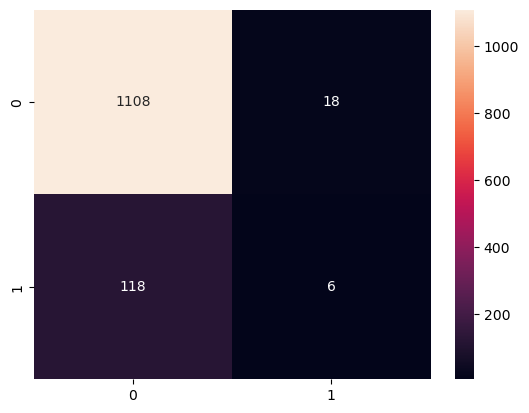

In [154]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='')


In [155]:
print ("Costomer : ",log_loss(y_test,y_pred))


Costomer :  3.757830385969278


In [156]:
# Result:
#     All models predict same result 
#     All models' accuracy was about 90% and only multinomialNB and ComplemnentNB was lower than the others